# Spaceship Titanic



```
# Equipo 4
Abraham Gil Félix | A01750884
Carlos de Jésus Ávila González | A01750220
Enrique Maldonado Chavarría | A01652370
Juan Daniel Aranda Morales  | A01379571
Eduardo Acosta Hernández | A01375206
```



## Importación de librerías 

In [65]:
import re
import os
import pydot 
import pandas as pd
import numpy as np

# Exportar modelos de ML
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
from scipy.linalg import sqrtm
from gc import collect
from termcolor import colored

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [2]:
# Conexión con Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de los datos

In [3]:
# Carga del conjunto de entrenamiento
train_set = pd.read_csv('/content/drive/Shareddrives/TeamAI-4/Reto/train.csv')

In [4]:
# Carga del conjunto de prueba
test_set = pd.read_csv('/content/drive/Shareddrives/TeamAI-4/Reto/test.csv')

In [5]:
# Valores únicos por cada variable
for i in train_set.columns:
  print(str(i) + ':', train_set[i].unique())

PassengerId: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet: ['Europa' 'Earth' 'Mars' nan]
CryoSleep: [False True nan]
Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP: [False True nan]
RoomService: [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt: [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall: [   0.   25.  371. ... 1085.  510. 1872.]
Spa: [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck: [   0.   44.   49. ... 1164.  971. 3235.]
Name: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Props

## Visual EDA

In [6]:
# Visualización de las variables y su tipo del conjunto de datos de entrenamiento
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# Visualización de las variables y su tipo del conjunto de datos de prueba
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
# Visualización de datos faltantes en cada variable del conjunto de entrenamiento
train_set.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Visualización del porcentaje de datos faltantes en cada variable del conjunto de entrenamiento
train_set.isna().sum()/train_set.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [10]:
# Visualización de datos faltantes en cada variable del conjunto de prueba
test_set.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
# Visualización del porcentaje de datos faltantes en cada variable del conjunto de prueba
test_set.isna().sum()/test_set.shape[0]*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

## Procesamiento y transformación de los datos

In [12]:
train_set_copy = pd.DataFrame()
train_set_copy['Transported'] = train_set['Transported'] 

### Añadir atributos

In [13]:
train_set['PassengerGroup'] = train_set['PassengerId'].str.split('_', expand = True)[0]
test_set['PassengerGroup'] = test_set['PassengerId'].str.split('_', expand = True)[0]

In [14]:
lista_atributos = list(train_set.drop('Transported', axis=1).columns)
Target = 'Transported'

In [15]:
train_set.Cabin.str.split('/', expand= True).add_prefix('Cabin').join(train_set.Transported)

,Cabin0,Cabin1,Cabin2,Transported
0,B,0,P,False
1,F,0,S,True
2,A,0,S,False
3,A,0,S,False
4,F,1,S,True
...,...,...,...,...
8688,A,98,P,False
8689,G,1499,S,False
8690,G,1500,S,True
8691,E,608,S,False


In [16]:
_cabin_prf = train_set.Cabin.str.split('/', expand= True).add_prefix('Cabin').join(train_set.Transported)
_cabin_prf['CabinCtg'] = _cabin_prf['Cabin0']+_cabin_prf['Cabin2']

In [17]:
def AddFeatures(X: pd.DataFrame):
  """
  Esta función agrega la división de nombres-cabina, una nueva variable para el gasto total 
  y da tratamiento a los valores nulos en las amenidades.
  """
    
  df = pd.concat((X[lista_atributos].drop(['Name', 'Cabin'],axis=1),
                  X.Name.str.split(' ', expand= True).add_prefix('Name'),
                  X.Cabin.str.split('/', expand= True).add_prefix('Cabin')), axis=1)

  df[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0.0)
  df['TotalSpend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    
  df['VIP'] = df['VIP']*1.0
  df['VIP'] = df['VIP'].astype(float)
    
  return df

In [18]:
AddFeatures(train_set)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,Name0,Name1,Cabin0,Cabin1,Cabin2,TotalSpend
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0001,Maham,Ofracculy,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0002,Juanna,Vines,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0003,Altark,Susent,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0003,Solam,Susent,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0004,Willy,Santantines,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,9276,Gravior,Noxnuther,A,98,P,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,9278,Kurta,Mondalley,G,1499,S,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,9279,Fayey,Connon,G,1500,S,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,9280,Celeon,Hontichre,E,608,S,4637.0


In [19]:
train_set = AddFeatures(train_set)

In [20]:
train_set.isnull().sum()

PassengerId         0
HomePlanet        201
CryoSleep         217
Destination       182
Age               179
VIP               203
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
PassengerGroup      0
Name0             200
Name1             200
Cabin0            199
Cabin1            199
Cabin2            199
TotalSpend          0
dtype: int64

In [21]:
AddFeatures(test_set)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,Name0,Name1,Cabin0,Cabin1,Cabin2,TotalSpend
0,0013_01,Earth,True,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0013,Nelly,Carsoning,G,3,S,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,0018,Lerome,Peckers,F,4,S,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0019,Sabih,Unhearfus,C,0,S,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0021,Meratz,Caltilter,C,1,S,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,0023,Brence,Harperez,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266,Jeron,Peter,G,1496,S,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,9269,Matty,Scheron,NaN,NaN,NaN,1018.0
4274,9271_01,Mars,True,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9271,Jayrin,Pore,D,296,P,0.0
4275,9273_01,Europa,False,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,9273,Kitakan,Conale,D,297,P,3203.0


In [22]:
test_set = AddFeatures(test_set)

In [23]:
test_set.isnull().sum()

PassengerId         0
HomePlanet         87
CryoSleep          93
Destination        92
Age                91
VIP                93
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
PassengerGroup      0
Name0              94
Name1              94
Cabin0            100
Cabin1            100
Cabin2            100
TotalSpend          0
dtype: int64

In [24]:
def CreateJourney(df: pd.DataFrame):
    """
    Esta función trata los valores faltantes de las variables 'HomePlanet' y 'Destination', 
    además de combinarlos para crear un nuevo atributo 'Journey'.
    1. Planeta de origen: 
      a. Según el nombre de la familia, se llenan los valores faltantes del planeta de origen 
      (todos los miembros de la familia tienen el mismo planeta de origen).
      b. Los valores nulos restantes se rellenan con la moda.
    
    2. Destino:
      a. Según el nombre de la familia, se crea la moda para 'Destination' y se rellenan los valores nulos
      b. Para todos los valores nulos restantes, se utiliza la moda.
    
    3. Journey = HomePlanet - Destination es la función de interacción.
    """
    
    # 1. Fostering null treatment for HomePlanet based on last name and overall mode:-
    df = df.merge(df[['Name1', 'HomePlanet']].drop_duplicates().dropna(),
                  how= 'left',left_on= 'Name1', right_on= 'Name1', suffixes= ('', '_'));
    df['HomePlanet'] = df['HomePlanet'].fillna(df.HomePlanet_)
    df['HomePlanet'] = df['HomePlanet'].fillna(df[['HomePlanet']].apply(lambda x: x.mode()).values[0][0])

    # 2. Fostering null treatment for destination based on last name and overall mode:-
    _ = df[['Name1', 'Destination']].groupby('Name1')['Destination'].value_counts(ascending= False);
    _.name = 'Nb_Destination';
    _ = _.reset_index().groupby(['Name1']).head(1)

    df = df.merge(_, how = 'left', left_on= 'Name1', right_on= 'Name1', suffixes= ('', '_'))
    df['Destination'] = df['Destination'].fillna(df['Destination_'])
    df['Destination'] = df['Destination'].fillna(df[['Destination']].apply(lambda x: x.mode()).values[0][0])
    del _;

    # 3. Developing interaction column for journey:-
    df['Journey'] = df['HomePlanet'] + ' - ' + df['Destination']
    df = df.drop(['HomePlanet', 'Destination', 'HomePlanet_', 'Destination_', 'Nb_Destination'], 
                 axis=1, errors = 'ignore')

    return df;

In [25]:
CreateJourney(train_set)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,Name0,Name1,Cabin0,Cabin1,Cabin2,TotalSpend,Journey
0,0001_01,False,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0001,Maham,Ofracculy,B,0,P,0.0,Europa - TRAPPIST-1e
1,0002_01,False,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0002,Juanna,Vines,F,0,S,736.0,Earth - TRAPPIST-1e
2,0003_01,False,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0003,Altark,Susent,A,0,S,10383.0,Europa - TRAPPIST-1e
3,0003_02,False,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0003,Solam,Susent,A,0,S,5176.0,Europa - TRAPPIST-1e
4,0004_01,False,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0004,Willy,Santantines,F,1,S,1091.0,Earth - TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,9276,Gravior,Noxnuther,A,98,P,8536.0,Europa - 55 Cancri e
8689,9278_01,True,18.0,0.0,0.0,0.0,0.0,0.0,0.0,9278,Kurta,Mondalley,G,1499,S,0.0,Earth - PSO J318.5-22
8690,9279_01,False,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,9279,Fayey,Connon,G,1500,S,1873.0,Earth - TRAPPIST-1e
8691,9280_01,False,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,9280,Celeon,Hontichre,E,608,S,4637.0,Europa - 55 Cancri e


In [26]:
train_set = CreateJourney(train_set)

In [27]:
train_set.isnull().sum()

PassengerId         0
CryoSleep         217
Age               179
VIP               203
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
PassengerGroup      0
Name0             200
Name1             200
Cabin0            199
Cabin1            199
Cabin2            199
TotalSpend          0
Journey             0
dtype: int64

In [28]:
CreateJourney(test_set)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,Name0,Name1,Cabin0,Cabin1,Cabin2,TotalSpend,Journey
0,0013_01,True,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0013,Nelly,Carsoning,G,3,S,0.0,Earth - TRAPPIST-1e
1,0018_01,False,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,0018,Lerome,Peckers,F,4,S,2832.0,Earth - TRAPPIST-1e
2,0019_01,True,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0019,Sabih,Unhearfus,C,0,S,0.0,Europa - 55 Cancri e
3,0021_01,False,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0021,Meratz,Caltilter,C,1,S,7418.0,Europa - TRAPPIST-1e
4,0023_01,False,20.0,0.0,10.0,0.0,635.0,0.0,0.0,0023,Brence,Harperez,F,5,S,645.0,Earth - TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266,Jeron,Peter,G,1496,S,0.0,Earth - TRAPPIST-1e
4273,9269_01,False,42.0,0.0,0.0,847.0,17.0,10.0,144.0,9269,Matty,Scheron,NaN,NaN,NaN,1018.0,Earth - TRAPPIST-1e
4274,9271_01,True,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9271,Jayrin,Pore,D,296,P,0.0,Mars - 55 Cancri e
4275,9273_01,False,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,9273,Kitakan,Conale,D,297,P,3203.0,Europa - 55 Cancri e


In [29]:
test_set = CreateJourney(test_set)

In [30]:
test_set.isnull().sum()

PassengerId         0
CryoSleep          93
Age                91
VIP                93
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
PassengerGroup      0
Name0              94
Name1              94
Cabin0            100
Cabin1            100
Cabin2            100
TotalSpend          0
Journey             0
dtype: int64

In [31]:
train_np_group = train_set.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
train_np_group = train_np_group.rename(columns = {'PassengerId': 'GroupSize'})

train_set = train_set.merge(train_np_group[['PassengerGroup', 'GroupSize']], how = 'left', on = ['PassengerGroup'])
train_set['PassengerGroup'] = train_set['PassengerGroup'].astype(float)

In [32]:
test_np_group = test_set.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
test_np_group = test_np_group.rename(columns = {'PassengerId': 'GroupSize'})

test_set = test_set.merge(test_np_group[['PassengerGroup', 'GroupSize']], how = 'left', on = ['PassengerGroup'])
test_set['PassengerGroup'] = test_set['PassengerGroup'].astype(float)

In [33]:
palone = []
for i in train_set['GroupSize']:
  if i == 1: 
    palone.append(1)
  else:
    palone.append(0)

train_set['PassengerAlone'] = palone

In [34]:
palone = []
for i in test_set['GroupSize']:
  if i == 1: 
    palone.append(1)
  else:
    palone.append(0)

test_set['PassengerAlone'] = palone

In [35]:
noexp = []

for i in train_set['TotalSpend']:
  if i > 0:
    noexp.append(1)
  else:
    noexp.append(0)

train_set['NoExpending'] = noexp

In [36]:
noexp = []

for i in test_set['TotalSpend']:
  if i > 0:
    noexp.append(1)
  else:
    noexp.append(0)

test_set['NoExpending'] = noexp

### Tratamiento de valores nulos

In [37]:
def Null_AgeCrySlp(df:pd.DataFrame):
    """
    Esta función llena los valores vacíos en las variables 'Age' y 'CryoSleep' 
    como se muestra a continuación:
     CryoSleep: -
     1. Para los pasajeros que no gastan: cryosleep=1, ya que los clientes en cryosleep no pueden gastar.
     2. Si 'Age' <=12 y 'CryoSleep' = NaN, entonces 'CryoSleep' = 1.
     3. Para aquellos pasajeros que gastan, 'CryoSleep' = 0.
    
     Age:-
     1. Para los pasajeros en 'CryoSleep', se considera una edad media > 12 
     para la familia (el niño no puede gastar).
     2. Para todos los valores nulos restantes, se utiliza la mediana.
    
     También se crea la variable 'Is_Child' para niños (Edad <=12).
    """
    
    # 1. Filling nulls in cryosleep based on spending and age details:-
    df['CryoSleep'] = df['CryoSleep'].astype(float)
    df.loc[(df.CryoSleep.isna()==True) & (df.TotalSpend == 0.0), ['CryoSleep']] = 1.0;
    # Assuming child (age <=12) and null cryosleep = cryosleep
    df.loc[(df.CryoSleep.isna()==True) & (df.Age <=12), ['CryoSleep']] = 1.0;
    # Assuming no cryosleep for spenders:-
    df.loc[(df.CryoSleep.isna()==True) & (df['TotalSpend'] > 0.0), ['CryoSleep']] = 0.0;
    df['CryoSleep'] = df['CryoSleep'].astype(int)
    
    # 2. Assuming average family age for spenders:-
    df = df.merge(df.loc[df.Age >12,['Name1', 'Age']].dropna().groupby('Name1').agg(_Age= pd.NamedAgg('Age', np.median)),
                  how= 'left', left_on= 'Name1', right_on='Name1', suffixes= ('',''))
    df.loc[(df.Age.isna()==True) & ((df.TotalSpend > 0.0) | (df.CryoSleep==0)), ['Age']] = df._Age;
    # Filling median age for remaining nulls:-
    df['Age'] = df['Age'].fillna(df.Age.median());
    
    # 3. Creating flag for child:-
    df['Is_Child'] = np.where(df.Age <= 12, 1,0);
    df['Is_Child'] = df['Is_Child'].astype(int)
    df = df.drop(['_Age'], axis=1);  
    df['Age'] = df['Age'].astype(int)
    return df

In [38]:
Null_AgeCrySlp(train_set)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,...,Name1,Cabin0,Cabin1,Cabin2,TotalSpend,Journey,GroupSize,PassengerAlone,NoExpending,Is_Child
0,0001_01,0,39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Ofracculy,B,0,P,0.0,Europa - TRAPPIST-1e,1,1,0,0
1,0002_01,0,24,0.0,109.0,9.0,25.0,549.0,44.0,2.0,...,Vines,F,0,S,736.0,Earth - TRAPPIST-1e,1,1,1,0
2,0003_01,0,58,1.0,43.0,3576.0,0.0,6715.0,49.0,3.0,...,Susent,A,0,S,10383.0,Europa - TRAPPIST-1e,2,0,1,0
3,0003_02,0,33,0.0,0.0,1283.0,371.0,3329.0,193.0,3.0,...,Susent,A,0,S,5176.0,Europa - TRAPPIST-1e,2,0,1,0
4,0004_01,0,16,0.0,303.0,70.0,151.0,565.0,2.0,4.0,...,Santantines,F,1,S,1091.0,Earth - TRAPPIST-1e,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41,1.0,0.0,6819.0,0.0,1643.0,74.0,9276.0,...,Noxnuther,A,98,P,8536.0,Europa - 55 Cancri e,1,1,1,0
8689,9278_01,1,18,0.0,0.0,0.0,0.0,0.0,0.0,9278.0,...,Mondalley,G,1499,S,0.0,Earth - PSO J318.5-22,1,1,0,0
8690,9279_01,0,26,0.0,0.0,0.0,1872.0,1.0,0.0,9279.0,...,Connon,G,1500,S,1873.0,Earth - TRAPPIST-1e,1,1,1,0
8691,9280_01,0,32,0.0,0.0,1049.0,0.0,353.0,3235.0,9280.0,...,Hontichre,E,608,S,4637.0,Europa - 55 Cancri e,2,0,1,0


In [39]:
train_set = Null_AgeCrySlp(train_set)

In [40]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   CryoSleep       8693 non-null   int64  
 2   Age             8693 non-null   int64  
 3   VIP             8490 non-null   float64
 4   RoomService     8693 non-null   float64
 5   FoodCourt       8693 non-null   float64
 6   ShoppingMall    8693 non-null   float64
 7   Spa             8693 non-null   float64
 8   VRDeck          8693 non-null   float64
 9   PassengerGroup  8693 non-null   float64
 10  Name0           8493 non-null   object 
 11  Name1           8493 non-null   object 
 12  Cabin0          8494 non-null   object 
 13  Cabin1          8494 non-null   object 
 14  Cabin2          8494 non-null   object 
 15  TotalSpend      8693 non-null   float64
 16  Journey         8693 non-null   object 
 17  GroupSize       8693 non-null   i

In [41]:
Null_AgeCrySlp(test_set)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,...,Name1,Cabin0,Cabin1,Cabin2,TotalSpend,Journey,GroupSize,PassengerAlone,NoExpending,Is_Child
0,0013_01,1,27,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,Carsoning,G,3,S,0.0,Earth - TRAPPIST-1e,1,1,0,0
1,0018_01,0,19,0.0,0.0,9.0,0.0,2823.0,0.0,18.0,...,Peckers,F,4,S,2832.0,Earth - TRAPPIST-1e,1,1,1,0
2,0019_01,1,31,0.0,0.0,0.0,0.0,0.0,0.0,19.0,...,Unhearfus,C,0,S,0.0,Europa - 55 Cancri e,1,1,0,0
3,0021_01,0,38,0.0,0.0,6652.0,0.0,181.0,585.0,21.0,...,Caltilter,C,1,S,7418.0,Europa - TRAPPIST-1e,1,1,1,0
4,0023_01,0,20,0.0,10.0,0.0,635.0,0.0,0.0,23.0,...,Harperez,F,5,S,645.0,Earth - TRAPPIST-1e,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34,0.0,0.0,0.0,0.0,0.0,0.0,9266.0,...,Peter,G,1496,S,0.0,Earth - TRAPPIST-1e,2,0,0,0
4273,9269_01,0,42,0.0,0.0,847.0,17.0,10.0,144.0,9269.0,...,Scheron,NaN,NaN,NaN,1018.0,Earth - TRAPPIST-1e,1,1,1,0
4274,9271_01,1,26,0.0,0.0,0.0,0.0,0.0,0.0,9271.0,...,Pore,D,296,P,0.0,Mars - 55 Cancri e,1,1,0,0
4275,9273_01,0,29,0.0,0.0,2680.0,0.0,0.0,523.0,9273.0,...,Conale,D,297,P,3203.0,Europa - 55 Cancri e,1,1,1,0


In [42]:
test_set = Null_AgeCrySlp(test_set)

In [43]:
test_set.isnull().sum()

PassengerId         0
CryoSleep           0
Age                 0
VIP                93
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
PassengerGroup      0
Name0              94
Name1              94
Cabin0            100
Cabin1            100
Cabin2            100
TotalSpend          0
Journey             0
GroupSize           0
PassengerAlone      0
NoExpending         0
Is_Child            0
dtype: int64

In [44]:
def Null_VIPCabin(df: pd.DataFrame):
    """
    Esta función trata los valores faltantes de los atributos 'VIP' y 'Cabin' utilizando el apellido.
    Se supone que los miembros de la misma familia se encuentran en la misma cabina y comparten el ID VIP.
    """

    # Assuming that members of the same family have the same VIP ID:-
    df = df.merge(df[['VIP', 'Name1']].groupby('Name1')['VIP'].max(), 
                how = 'left', left_on= 'Name1', right_on= 'Name1', suffixes= ('','_'))
    df['VIP'] = df['VIP'].fillna(df.VIP_)
    df['VIP'] = df['VIP'].fillna(0.0)
    df['VIP'] = df['VIP'].astype(int)

    # Assuming that members of the same family have the same cabin0/ cabin2 ID:-
    _ = df[['Cabin0', 'Name1']].groupby('Name1')['Cabin0'].value_counts()
    _.name = 'Nb_Records';
    df = df.merge(_.reset_index().groupby('Name1').head(1).drop('Nb_Records', axis=1), 
                  how= 'left', left_on= 'Name1', right_on= 'Name1', suffixes= ('','_'))
    df['Cabin0'] = df['Cabin0'].fillna(df.Cabin0_)
    del _;

    _ = df[['Cabin2', 'Name1']].groupby('Name1')['Cabin2'].value_counts()
    _.name = 'Nb_Records';
    df = df.merge(_.reset_index().groupby('Name1').head(1).drop('Nb_Records', axis=1), 
                  how= 'left', left_on= 'Name1', right_on= 'Name1', suffixes= ('','_'))
    df['Cabin2'] = df['Cabin2'].fillna(df.Cabin2_)

    df = df.drop(['Cabin0_', 'Cabin2_'], axis=1, errors= 'ignore')
    del _;

    # Considering remaining nulls with overall cabin mode based on VIP status:-
    df = df.merge(df.groupby(['VIP']).agg({'Cabin0': lambda df: df.mode(), 'Cabin2': lambda y: y.mode()}),
                  how= 'left', left_on= 'VIP', right_index= True, suffixes= ('', '_'))
    df['Cabin0'] = df['Cabin0'].fillna(df.Cabin0_)
    df['Cabin2'] = df['Cabin2'].fillna(df.Cabin2_)
    df = df.drop(['Cabin0_', 'Cabin2_', 'VIP_'], axis=1, errors= 'ignore')
 
    # Downcasting columns to conserve memory:-    
    df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']].astype(float)  
    
    # Dropping extra columns after usage:-
    df = df.drop(['Cabin1', 'Name0', 'Name1'], axis=1, errors= 'ignore')
    return df;

In [45]:
train_set = Null_VIPCabin(train_set)

In [46]:
train_set.isnull().sum()

PassengerId       0
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
PassengerGroup    0
Cabin0            0
Cabin2            0
TotalSpend        0
Journey           0
GroupSize         0
PassengerAlone    0
NoExpending       0
Is_Child          0
dtype: int64

In [47]:
test_set = Null_VIPCabin(test_set)

In [48]:
test_set.isnull().sum()

PassengerId       0
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
PassengerGroup    0
Cabin0            0
Cabin2            0
TotalSpend        0
Journey           0
GroupSize         0
PassengerAlone    0
NoExpending       0
Is_Child          0
dtype: int64

### Variables Dummy y LabelEncoder

In [49]:
label_encoder = LabelEncoder()

train_set['Cabin0'] = label_encoder.fit_transform(train_set['Cabin0']) 
test_set['Cabin0'] = label_encoder.fit_transform(test_set['Cabin0']) 

train_set['Cabin2'] = label_encoder.fit_transform(train_set['Cabin2']) 
test_set['Cabin2'] = label_encoder.fit_transform(test_set['Cabin2']) 

train_set['Journey'] = label_encoder.fit_transform(train_set['Journey']) 
test_set['Journey'] = label_encoder.fit_transform(test_set['Journey']) 

In [50]:
train_set_copy['Transported'] = train_set_copy['Transported'].astype(float)

### Eliminación de variables no significativas

In [51]:
# Eliminación de variables no significativas en el conjunto de entrenamiento
train_set = train_set.drop(['PassengerId'], axis=1)

In [52]:
# Eliminación de variables no significativas en el conjunto de prueba
test_set = test_set.drop(['PassengerId'], axis=1)

### Normalización de los datos

In [53]:
# Escalamiento de train_set
train_set_standard = (train_set - train_set.mean()) / train_set.std(ddof=1)
train_set_standard = np.sort(train_set_standard)
train_set_standard

array([[-1.85136616, -1.73430909, -1.17453362, ...,  0.59368581,
         0.70930164,  0.89947988],
       [-1.7339347 , -0.75099063, -0.64869741, ...,  0.85130383,
         0.89947988,  0.99135224],
       [-2.41259946, -1.73356031, -1.11162572, ...,  3.19014909,
         5.69529529,  6.35535925],
       ...,
       [-0.75099063, -0.64869741, -0.57720825, ...,  0.99135224,
         1.73925878,  2.84683496],
       [-1.11162572, -0.75099063, -0.3330855 , ...,  1.14023602,
         1.73963316,  2.58942754],
       [-1.11162572, -0.75099063, -0.31965877, ...,  1.20766268,
         1.73963316,  2.65671818]])

In [54]:
# Escalamiento de test_set
test_set_standard = (test_set - test_set.mean()) / test_set.std(ddof=1)
test_set_standard = np.sort(test_set_standard)
test_set_standard

array([[-1.70322544, -1.17069298, -0.64889717, ...,  0.95533275,
         0.99684854,  1.30504464],
       [-1.70138464, -0.76607815, -0.6849421 , ...,  0.90971657,
         0.99684854,  2.2872369 ],
       [-1.70101647, -1.37783395, -1.17069298, ...,  0.90971657,
         0.99684854,  1.30504464],
       ...,
       [-1.17069298, -1.00292688, -0.79454227, ...,  0.95180011,
         1.30504464,  1.70521612],
       [-1.00292688, -0.79454227, -0.76607815, ...,  0.90971657,
         1.49084452,  1.70595244],
       [-1.17069298, -0.98136024, -0.64889717, ...,  1.02180978,
         1.30504464,  1.70742509]])

### Partición de los datos

In [55]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CryoSleep       8693 non-null   int64  
 1   Age             8693 non-null   int64  
 2   VIP             8693 non-null   int64  
 3   RoomService     8693 non-null   float64
 4   FoodCourt       8693 non-null   float64
 5   ShoppingMall    8693 non-null   float64
 6   Spa             8693 non-null   float64
 7   VRDeck          8693 non-null   float64
 8   PassengerGroup  8693 non-null   float64
 9   Cabin0          8693 non-null   int64  
 10  Cabin2          8693 non-null   int64  
 11  TotalSpend      8693 non-null   float64
 12  Journey         8693 non-null   int64  
 13  GroupSize       8693 non-null   int64  
 14  PassengerAlone  8693 non-null   int64  
 15  NoExpending     8693 non-null   int64  
 16  Is_Child        8693 non-null   int64  
dtypes: float64(7), int64(10)
memory u

In [56]:
train_set.drop(columns=['PassengerGroup'], inplace=True)

In [57]:
X = train_set.copy()
y = train_set_copy['Transported']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

## Modelación

In [59]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CryoSleep       8693 non-null   int64  
 1   Age             8693 non-null   int64  
 2   VIP             8693 non-null   int64  
 3   RoomService     8693 non-null   float64
 4   FoodCourt       8693 non-null   float64
 5   ShoppingMall    8693 non-null   float64
 6   Spa             8693 non-null   float64
 7   VRDeck          8693 non-null   float64
 8   Cabin0          8693 non-null   int64  
 9   Cabin2          8693 non-null   int64  
 10  TotalSpend      8693 non-null   float64
 11  Journey         8693 non-null   int64  
 12  GroupSize       8693 non-null   int64  
 13  PassengerAlone  8693 non-null   int64  
 14  NoExpending     8693 non-null   int64  
 15  Is_Child        8693 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 1.1 MB


In [60]:
models = {
    "K-NearestNeighbour": KNeighborsClassifier(n_neighbors=9),
    "LogisticRegression": LogisticRegression(random_state=44),
    "DecisionTree": DecisionTreeClassifier(random_state=44),
    "RandomForest": RandomForestClassifier(random_state=44),
    "GradiantBoosting": GradientBoostingClassifier(learning_rate=0.21, random_state=44),
    "XGB": XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=44),
    "LGBM": LGBMClassifier(n_estimators=500, learning_rate=0.060000000000000005, 
                           max_depth=4,random_state=44), 
    "GaussianNaiveBayes": GaussianNB()
}

train_scores = {}
test_scores = {}
new_prediction = {}

for model in models:
    models[model].fit(X_train, y_train)
    train_scores[model] = models[model].score(X_train, y_train)
    test_scores[model] = models[model].score(X_test, y_test)
    new_prediction[model] = models[model].predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [61]:
sorted_scores1 = pd.Series(train_scores).sort_values(ascending = False)
print("-------------------------------------------")
print("Score in training")
print(sorted_scores1)
print("-------------------------------------------")

-------------------------------------------
Score in training
DecisionTree          0.964625
RandomForest          0.964625
LGBM                  0.857348
XGB                   0.850158
GradiantBoosting      0.836353
K-NearestNeighbour    0.814208
LogisticRegression    0.787460
GaussianNaiveBayes    0.738136
dtype: float64
-------------------------------------------


In [62]:
sorted_scores = pd.Series(test_scores).sort_values(ascending = False)
print("-------------------------------------------")
print("Score in test")
print(sorted_scores)
print("-------------------------------------------")

-------------------------------------------
Score in test
GradiantBoosting      0.808511
XGB                   0.806786
LGBM                  0.806210
RandomForest          0.790109
LogisticRegression    0.782634
K-NearestNeighbour    0.779758
GaussianNaiveBayes    0.734905
DecisionTree          0.728005
dtype: float64
-------------------------------------------


In [68]:
model1 = LGBMClassifier(random_state=44)
model2 = RandomForestClassifier(random_state=44)
model3 = GradientBoostingClassifier(random_state=44)
model4 = XGBClassifier(random_state=44)
estimator = [('model1',model1),('model2',model2),('model3',model3),('model4',model4)]
lr = LogisticRegression(random_state=44)
model_best = StackingClassifier(estimators=estimator, final_estimator=lr)
model_best.fit(X_train, y_train)

StackingClassifier(estimators=[('model1', LGBMClassifier(random_state=44)),
                               ('model2',
                                RandomForestClassifier(random_state=44)),
                               ('model3',
                                GradientBoostingClassifier(random_state=44)),
                               ('model4', XGBClassifier(random_state=44))],
                   final_estimator=LogisticRegression(random_state=44))

In [69]:
model_best.score(X_test,y_test)

0.8096607245543416

In [66]:
model1 = LGBMClassifier(learning_rate=0.06, n_estimators=800, max_depth=10, boosting_type='gbdt', objective='binary')
model2 = RandomForestClassifier(n_estimators=600, max_depth=15, min_samples_split=20, random_state=44)
model3 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=250, max_depth=7, min_samples_split=8)
model4 = XGBClassifier(learning_rate=0.07, n_estimators=670)
estimator = [('model1',model1),('model2',model2),('model3',model3),('model4',model4)]
lr = LogisticRegression(C=0.01)
model = StackingClassifier(estimators=estimator, final_estimator=lr)
model.fit(X_train, y_train)

StackingClassifier(estimators=[('model1',
                                LGBMClassifier(learning_rate=0.06, max_depth=10,
                                               n_estimators=800,
                                               objective='binary')),
                               ('model2',
                                RandomForestClassifier(max_depth=15,
                                                       min_samples_split=20,
                                                       n_estimators=600,
                                                       random_state=44)),
                               ('model3',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=7,
                                                           min_samples_split=8,
                                                           n_estimators=250)),
                               ('model4',
              

In [67]:
model.score(X_test,y_test)

0.8125359401955147

#### RandomForest

In [70]:
rfc_old = RandomForestClassifier(random_state=44)
rfc_old.fit(X_train, y_train)

rfc_old_predictions = rfc_old.predict(X_test)

print(rfc_old)

print('Confusion Matrix: \n {} \n Accuracy Score: \n {} \n Recall Score: \n {}'.format(
    confusion_matrix(y_test, rfc_old_predictions),
    accuracy_score(y_test, rfc_old_predictions), 
    recall_score(y_test, rfc_old_predictions)))

RandomForestClassifier(random_state=44)
Confusion Matrix: 
 [[710 153]
 [212 664]] 
 Accuracy Score: 
 0.7901092581943646 
 Recall Score: 
 0.7579908675799086


In [71]:
train_set.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin0', 'Cabin2', 'TotalSpend', 'Journey',
       'GroupSize', 'PassengerAlone', 'NoExpending', 'Is_Child'],
      dtype='object')

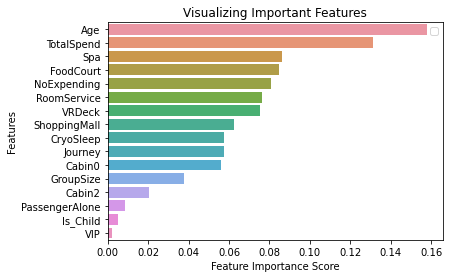

In [72]:
# Random Forest
feature_imp = pd.Series(rfc_old.feature_importances_, index=X_train[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin0', 'Cabin2', 'TotalSpend', 'Journey', 'GroupSize', 'PassengerAlone', 'NoExpending', 'Is_Child']].columns).sort_values(ascending=False)
feature_imp

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [73]:
# Grid Search basado en Out-Of-Bag Score
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [100, 1000],
                 'max_depth'   : [None, 3, 6, 9],
                 'max_features': [None, 5, 9, 11, 13, 16],
                 'criterion'   : ['gini', 'entropy'],
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 1000} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 1000} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 1000} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 1000} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 13, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 13, 'n_estimators': 1000} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 16, 'n_est

,oob_accuracy,criterion,max_depth,max_features,n_estimators
39,0.798677,gini,9.0,5.0,1000
86,0.798389,entropy,9.0,5.0,100
87,0.798389,entropy,9.0,5.0,1000
41,0.797383,gini,9.0,9.0,1000
89,0.796808,entropy,9.0,9.0,1000
...,...,...,...,...,...
22,0.760713,gini,3.0,16.0,100
15,0.745326,gini,3.0,5.0,1000
14,0.744176,gini,3.0,5.0,100
62,0.741156,entropy,3.0,5.0,100


In [ ]:
rfc_best = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=9, 
                                  max_features=5, random_state=44)
rfc_best.fit(X_train, y_train)

rfc_best_predictions = rfc_best.predict(X_test)

print(rfc_best)

print('Confusion Matrix: \n {} \n Accuracy Score: \n {} \n Recall Score: \n {}'.format(
    confusion_matrix(y_test, rfc_best_predictions),
    accuracy_score(y_test, rfc_best_predictions), 
    recall_score(y_test, rfc_best_predictions)))

#### LGBM

In [ ]:
lgbm_best = LGBMClassifier(n_estimators=500, learning_rate=0.060000000000000005, 
                           max_depth=4,random_state=44)
lgbm_best.fit(X_train, y_train)

lgbm_best_predictions = lgbm_best.predict(X_test)

print(lgbm_best)

print('Confusion Matrix: \n {} \n Accuracy Score: \n {} \n Recall Score: \n {}'.format(
    confusion_matrix(y_test, lgbm_best_predictions),
    accuracy_score(y_test, lgbm_best_predictions), 
    recall_score(y_test, lgbm_best_predictions)))

In [ ]:
lgbm_best.feature_importances_

In [ ]:
dump(lgbm_best, 'LGBMv1SpaceshipTitanic.joblib')

In [ ]:
lgbm_model = load('LGBMv1SpaceshipTitanic.joblib')

In [ ]:
lgbm_model_predictions = lgbm_model.predict(test_set)
lgbm_model_predictions

In [ ]:
sample3 = pd.read_csv('/content/drive/Shareddrives/TeamAI-4/Reto/sample_submission.csv')
sample3.head()

In [ ]:
sample3.drop(columns=['Transported'], inplace=True)

In [ ]:
sample3['Transported'] = lgbm_model_predictions

In [ ]:
sample3.replace(to_replace=0, value=False, inplace=True)
sample3.replace(to_replace=1, value=True, inplace=True)
sample3.to_csv('resultsLGBMv1.csv')

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.1, 0.2, 0.21, 0.22, 0.23]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate, random_state=44)
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])
    
# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

In [ ]:
# Grid Search basado en Out-Of-Bag Score
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [100, 1000],
                 'max_depth'   : [3, 6, 9],
                 'max_features': [6, 9, 12],
                 'learning_rate'   : [0.2, 0.21, 0.22],
                 'criterion'   : ['friedman_mse'],
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'score': []}

for params in param_grid:
    
    modelo = GradientBoostingClassifier(
                random_state = 42,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['score'].append(modelo.score(X_test, y_test))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('score', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados

In [ ]:
gbc_best = GradientBoostingClassifier(learning_rate=0.21, random_state=42)
gbc_best.fit(X_train, y_train)

gbc_best_predictions = gbc_best.predict(X_test)

print(gbc_best)

print('Confusion Matrix: \n {} \n Accuracy Score: \n {} \n Recall Score: \n {}'.format(
    confusion_matrix(y_test, gbc_best_predictions),
    accuracy_score(y_test, gbc_best_predictions), 
    recall_score(y_test, gbc_best_predictions)))

In [ ]:
gbc_best.feature_importances_

In [ ]:
dump(gbc_best, 'GradientBoostingv6SpaceshipTitanic.joblib')

In [ ]:
gbc_model = load('GradientBoostingv6SpaceshipTitanic.joblib')

In [ ]:
test_set.drop(columns=['PassengerGroup'], inplace=True)

In [ ]:
gbc_model_predictions = gbc_model.predict(test_set)
gbc_model_predictions

In [ ]:
sample3 = pd.read_csv('/content/drive/Shareddrives/TeamAI-4/Reto/sample_submission.csv')
sample3.head()

In [ ]:
sample3.drop(columns=['Transported'], inplace=True)

In [ ]:
sample3['Transported'] = gbc_model_predictions

In [ ]:
sample3.replace(to_replace=0, value=False, inplace=True)
sample3.replace(to_replace=1, value=True, inplace=True)
sample3.to_csv('resultsGBCv6.csv')